##### Copyright 2018 The TensorFlow Authors.

**TUTORIAL GIULI : https://www.youtube.com/watch?v=6g4O5UOH304&t=3547s**

¿Cómo funciona una red neuronal y qué es una red neuronal?
 
Podemos tener las conexiones de diferentes maneras:
- Red neuronal completamente conectada: lo que significa que cada neurona en una capa es conectada a cada neurona en la siguiente capa.

Las conexiones tienen lo que se conocen como pesos.

La primera capa se llama capa de entrada porque es la primera capa en nuestra red neuronal y la ultima capa de salida.

Conocemos ya que una red neuronal, le das unos valores de entrada te devuelve una salida que seria el **sumario de (I*W)+B** siendo I la entrada siendo W el peso de dicha entrada y B el sego de dicho peso de entrada. Se mira si la solucion ha sido correcta, sino, ajusta los pesos y los segos y vuelve a realizarlo.

**Función de activación:**

Es una **función no lineal** que le permite agregar un **grado de complejidad** a la red para que pueda tener mas de una función en comparación a una función en linea recta. 

Un ejemplo de una función de activación es algo asi como una **función sigmoidea** ahora una función sigmoidea lo que hace es mapear cualquier valor que le de entre -1 y 1, asi como cuando creamos esta red, nuestra saluda podria ser un 7, este valor esta mas cerca de 1 que de 0. La función sigmoide hace que sea una función no lineal y toma cualquier valor y esencialmente cuanto mas cerca este ese valor al infinito, mas cerca estara la salida de ese valor a 1 y cuando mas cerca este de menos infinito mas cerca estara de la saluda de ese valor a -1.

Estas funciones de activación reducen sus datos a digitos que queremos.

**La función de activación se aplica sobre (sumatorio)(I*W)+B** , el **resultado de esta será nuestra salida de la red**. La razon es para que cuando estemos ajustando nuestros pesos y sesgos y agregamos esa activacion tengamos una función mas compleja que una linea recta (funcion lineal)

**Otra función de activacion** se conoce como **unidad lineal rectificada**, esta toma todos los valores que son negativos y los pone automaticamente a 0 y toma todos los valores que son positivos y simplemente los hace mas posivos. Hacen que nuestros datos apunten entre el 0 y el infinito positivo.

**Función de perdida**

Como se ajustan estos pesos y estos sesgos para que sepamos que estan ajustados.
Lo que hacemos es mirar la salida y compararlo con lo que deberia ser la saluda de nuestros datos de prueba y luego ajustamos. ¿Como sabemos cuanto ajustamos y que tan cerca estamos en ajustarlo bien? 

 Una funcion perdida esencialmente es una forma de calcular el error, esta dira como de incorrecta es su respuesta. Si la respuesta es 0.7 y la solucion correcta es 1 estamos muy cerca y la funcion de perdida sera 0.2, ajustara los pesos un cierto grado de 0.2 . Estas funciones de perdida no son funciones lineales, esto nos permitira crear modelos y redes neuronales mucho mas complejos, permitiendo asi resolver mejor los modelos
 
 Estas lo que hacen es comparar la salida con la salida verdadera y darle un error y en funcion de ese error modificara dichos pesos y segos. Si estas cerca de la solucion correcta modificaras muy poco si estas muy lejos modificaras mucho 

En este video vamos a entender los datos y entender como va a afectar eso a nuestro modelo :



In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Clasificacion Basica: Predecir una imagen de moda

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/es/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/es/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/es/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

Note: Nuestra comunidad de Tensorflow ha traducido estos documentos. Como las traducciones de la comunidad
son basados en el "mejor esfuerzo", no hay ninguna garantia que esta sea un reflejo preciso y actual 
de la [Documentacion Oficial en Ingles](https://www.tensorflow.org/?hl=en).
Si tienen sugerencias sobre como mejorar esta traduccion, por favor envian un "Pull request"
al siguiente repositorio [tensorflow/docs](https://github.com/tensorflow/docs).
Para ofrecerse como voluntario o hacer revision de las traducciones de la Comunidad
por favor contacten al siguiente grupo [docs@tensorflow.org list](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs).

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas. No hay problema sino entiende todos los detalles; es un repaso rapido de un programa completo de Tensorflow con los detalles explicados a medida que avanza.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

In [1]:
pip install -q tensorflow==2.0.0-alpha0

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


In [3]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Moda MNIST esta construida como un reemplazo para el set de datos clasico [MNIST](http://yann.lecun.com/exdb/mnist/) 
casi siempre utilizado como el "Hola Mundo" de programas de aprendizaje automatico (ML) para computo de vision. El set de datos de MNIST contiene imagenes de digitos escrito a mano (0, 1, 2, etc.) en un formato identico al de los articulos de ropa que va a utilizar aca.

Esta guia utiliza Moda MNIST para variedad y por que es un poco mas retador que la regular MNIST. Ambos set de datos son relativamente pequenos y son usados para verificar que el algoritmo funciona como debe.

Aca, 60,000 imagenes son usadas para entrenar la red neuronal y 10,000 imagenes son usadas para evaluar que tan exacto aprendia la red a clasificar imagenes. Pueden acceder al set de moda de MNIST directamente desde TensorFlow. Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [3]:
#importamos los datos de keras de la moda
fashion_mnist = keras.datasets.fashion_mnist

#dividimos nuestros datos de entrenamiento y test, pasamos el 80 o 90% de datos para entrenarlos
#y el resto para probar la precision de la red y asegurarse de que funciona correctamente
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

[link text](https://)Al cargar el set de datos retorna cuatro arreglos en NumPy:

* El arreglo `train_images` y `train_labels` son los arreglos que *training set*—el modelo de datos usa para aprender.
* el modelo es probado contra los arreglos *test set*, el `test_images`, y `test_labels`.

Las imagenes son 28x28 arreglos de NumPy, con valores de pixel que varian de 0 a 255. Los *labels* son un arreglo de integros, que van del 0 al 9. Estos corresponden a la *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidoen el dataset, almacenelo aca para usarlos luego cuando se visualicen las imagenes:

In [4]:
#keras nos da la facilidad de que los datos ya estan cargados pero cuando queramos reali
#zarlos con datos nuestros tendremos que hacer bucles.. etc para cargarlos

#cada imagen tendrá una atiqueta especifica asignada simplemente tenemos que pedirla y nos dira 
#que etiqueta tiene dicha imagen.
print(train_labels[6])


7


In [5]:
#esto realmente no es util porq no sabemos que quiere decir esa etiqueta 
#u otra es por ello que voy a crear una lista que defina realmente lo que es

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

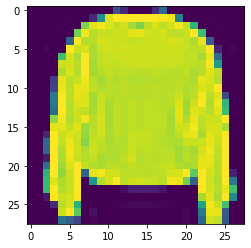

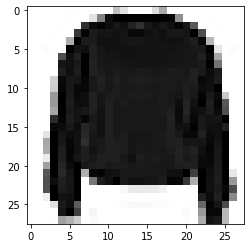

In [6]:
#VAR LA IMAGEN 7 DE TRAIN_IMAGES
#montar una imagen usando matplotlib
plt.imshow(train_images[7])
plt.show()
#Asi en estos colores lo muestra plt pero si queremos verla en binario
plt.imshow(train_images[7], cmap=plt.cm.binary)


In [17]:
#Ya tenemos los datos cargados, generalmente tenemos imagenes de
#28x28 pixeles. Estas vendran como una matriz

## Explore el set de datos

Explore el formato de el set de datos antes de entrenar el modelo. Lo siguiente muestra que hay 60,000 imagenes en el set de entrenamiento, con cada imagen representada por pixeles de 28x28:

In [7]:
#Muestra cuantas imagenes hay y como esta representada cada imagen
train_images.shape

(60000, 28, 28)

Asimismo, hay 60,000 etiquetas en el set de entrenamiento:

In [8]:
len(train_labels)

60000

Cada etiqueta es un integro entre 0 y 9:

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Hay 10,000 imagenes en el set de pruebas. Otra vez, cada imagen es representada como pixeles de 28x28:

In [10]:
test_images.shape

(10000, 28, 28)

Y el set de pruebas contiene 10,000 etiquetas de imagen:

In [11]:
len(test_labels)

10000

## Pre-procese el set de datos

El set de datos debe ser pre-procesada antes de entrenar la red. Si usted inspecciona la primera imagen en el set de entrenamiento, va a encontrar que los valores de los pixeles estan entre 0 y 255:

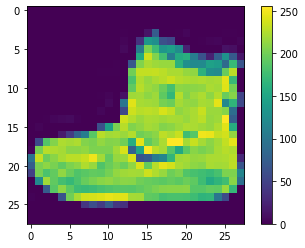

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Escale estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal. Para hacero, divida los valores por 255. Es importante que el *training set* y el *testing set* se pre-procesen de la misma forma:

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

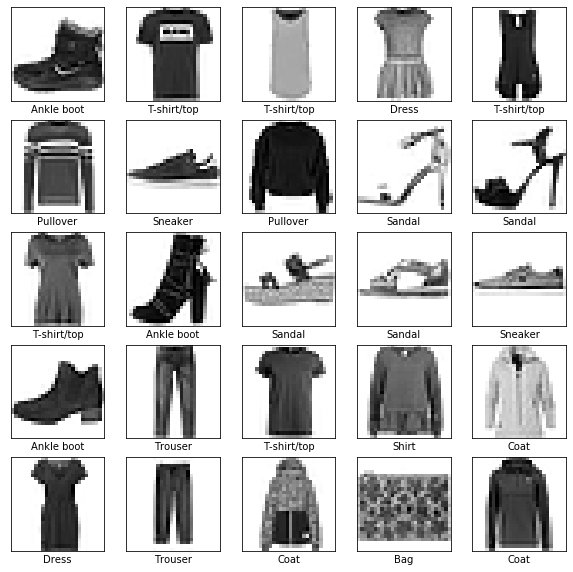

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
#En la segunda parte de este video vamos a entrenar ese modelo 
#con el que estamos trabajando. vamos a probar ese modelo para 
#ver que tan bien funcionó, tambien lo usaremos para
#predecir en imagenes individuales y todas esas cosas divertidas

In [ ]:
#La arquitectura de la red neuronal, qué estan haciendo las
#capas, qué aspecto tenian, por qué elijo esas capas ... etc
#sabemos que las imagenes vienen 28x28 pixeles y lo tenemos en 
#forma de una matriz y tenemos otra matriz dentro que 
#es como una matriz bidimensional, formada de forma 28x28 

#Podemos coger la matriz y pasarla a la red neuronal, pero esto
#realmente no va a funcionar, es por ello que tenenemos que 
#APLANAR LOS DATOS, esto es que agrupa todos los valores de una 
#fila en uno, es decir 28 filas de 28 pixeles son 784, por lo que
#como valor de entrada seran una capa de neuronas de 0 ...784

#Ahora hablaremos de las CAPAS DE SALIDA, nuestra salida será un
#numero de 0 a 9 idealmente, por lo que tendremos en nuestra 
#ultima capa 10 neuronas, una representando a cada salida o 10 
#clases, cada una de la neurona tendra un valor, ese valor 
#representa cuanto piensa la red que es de ese tipo de neurona
#la neurona que dada una imagen tenga el valor mas alto
# es la que la red predice que es ese, nosotros le diremos
#posteriormente cual es el correcto, la red ajustara todos los
#pesos y los sesgos de manera que el correcto se ilumine como 
#valor de 1, ese es nuestro objetivo

#CAPAS OCULTAS: La forma en la que tendremos conectada nuestras
#neuronas sera, nuestra capa de entrada estara conectada de forma
#densa a nuestra capa oculta y esta a la capa de salida, esto
#da mucha mas complejidad a la red, ya que tendremos muchisisimos
#mas pesos, estos buscaran muchos mas patrones.
#Elegimos 128 neuronas en la capa oculta, estamos diciendo que 
# vamos a permitir que esta capa oculta se de cuenta y salga
#alguna forma de analizar esta imagen y luego eso es esencialmente
#lo que vamos a hacer. El tamaño de la capa oculta suele ser el
#15 o 20% del tamaño de la capa de entrada , pero esto depende 
# de la aplicacion que este utilizando.



In [ ]:
#CREAR UN MODELO

#Lo primero que tenemos que hacer es definir una arquitectura o 
#las capas para un modelo, en este caso voy a de ir que el modelo
#es igual al modelo de keras secuencial, dentro de aqui poner
#una lista y vamos a comenzar a definir nuestras diferentes capas
#la primera capa sera una capa de entrada aplanada. Necesitamos 
#aplanar nuestros datos para que sean transitables a todas esas
#neuronas diferentes, cada vez que tengamos una matriz 2d o 3d 
#necesitamos aplanar la informacion para poder pasarlo a una 
#neurona individual.
#Ahora en la siguiente capa va a ser una capa DENSA, lo que 
#significa que es una capa completamente conectada, en este caso 
#vamos a darle 128 neuronas y vamos a configurar la funcion de 
#activacion "relu" "unidad lineal rectificadora" es una funcion
#de activacion muy rapida y funciona bien.
#La otra capa tambien la eligiremos densa y vamos a tener 10 
#neuronas y esta sera nuestra capa de salida y vamos a tener una 
#activacion de softmax, esta lo que hace es dar la probabilidad 
#de que la red piense que es un cierto valor para cada clase dada

model=keras.Secuential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#COMPILAR UN MODELO

#Lo que vamos a hacer ahora es configurar algunos parametros 
#para nuestro modelo. Voy a COMPILAR modelos y en este caso vamos 
#a usar un optimizados 'adam', vamos a utilizar la funcion 
# de perdida entropia cruzada , metricas. El modelo en este caso
#nos importa la precision o cuan bajo podemos obtener esta perdida

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#ENTRENAR AL MODELO

#Lo que vamos a hacer es modela dot fit y cuando lo ajustemos, 
#todo lo que haremos es darle nuestras imagenes de entrenamiento
#y nuestras entiquetas de entrenamiento, establecemos la cantidad
# de epocas, lo que va a hacer al azar es coger imagenes y 
# etiquetas que se corresponda entre si y va a alimentar eso
#a traves de la red neuronal, asiq cuantas epocas decides es 
#cuantas veces vas a ver la misma imagen, la razon por la que 
# hacemos esto es porque el orden en que entran las imagenes 
#influira en como son los parametros ajustando con la red
#cada vez que pase veras mejor que son unos pantalones y no una 
#camisa o sandalias. Aumentando la precision de nuestro modelo, 
# es algo con lo que se tiene q jugar, ya que dando mas epocas
#no necesareamente aumentas la precision de tu modelo 

model.fit(train_images, train_labels, epochs=5)

#Para ver si funciona y hemos entrenado bien nuestro modelo 
#tenemos que verlo en nuestras imagenes de test y ver cuantos 
#predice correctamente.
#Vamos a decir que la precisione es igual a la evaluacion de 
#puntos del modelo
#si queremos ver la precision de nuestro modelo, imprimimos
#test_acc
test_loss, test_acc=model.evaluate(test_images, test_labels)
print()


## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas

Los bloques de construccion basicos de una red neuronal son las *capas* o *layers*. Las capas extraen representaciones de el set de datos que se les alimentan. Con suerte, estas representaciones son considerables para el problema que estamos solucionando.

La mayoria de aprendizaje profundo consiste de unir capas sencillas. 
La mayoria de las capas como `tf.keras.layers.Dense`, tienen parametros que son aprendidos durante el entrenamiento.

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

La primera capa de esta red, `tf.keras.layers.Flatten`, 
transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles). Observe esta capa como una capa no apilada de filas de pixeles en la misma imagen y alineandolo. Esta capa no tiene parametros que aprender; solo reformatea el set de datos.

Despues de que los pixeles estan "aplanados", la secuencia consiste de dos capas`tf.keras.layers.Dense`. Estas estan densamente conectadas, o completamente conectadas. La primera capa `Dense` tiene 128 nodos (o neuronas). La segunda (y ultima) capa es una capa de 10 nodos *softmax* que devuelve un arreglo de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.

### Compile el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
* *Optimizer* — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.
El siguiente ejemplo usa *accuracy* (exactitud) , la fraccion de la imagenes que son correctamente clasificadas.

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenar el Modelo

Entrenar el modelo de red neuronal requiere de los siguientes pasos:

1. Entregue los datos de entrenamiento al modelo. En este ejemplo , el set de datos de entrenamiento estan en los arreglos `train_images` y `train_labels`.
2. el modelo aprende a asociar imagenes y etiquetas.
3. Usted le pregunta al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo,incluido en el arreglo `test_images`. Verifique que las predicciones sean iguales a las etiquetas de el arreglo`test_labels`.

Para comenzar a entrenar, llame el metodo `model.fit`, es llamado asi por que *fit* (ajusta) el modelo a el set de datos de entrenamiento:

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.4938 - accuracy: 0.8274
Epoch 2/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.3742 - accuracy: 0.8655
Epoch 3/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.3351 - accuracy: 0.8783
Epoch 4/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3144 - accuracy: 0.8839
Epoch 5/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2960 - accuracy: 0.8908
Epoch 6/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2802 - accuracy: 0.8961
Epoch 7/10
60000/60000 [==============================] - 7s 120us/sample - loss: 0.2676 - accuracy: 0.9006
Epoch 8/10
60000/60000 [==============================] - 7s 118us/sample - loss: 0.2550 - accuracy: 0.9046
Epoch 9/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.2469 - accuracy: 0.9079
Epoch 10/10
60000/60000 [===

A medida que el modelo entrena, la perdida y la exactitud son desplegadas. Este modelo alcanza una exactitud de 0.88 (o 88%) sobre el set de datos de entrenamiento.

## Evaluar Exactitud

Siguente, compare como el rendimiento del modelo sobre el set de datos:

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.3275 - accuracy: 0.8833

Test accuracy: 0.8833


Resulta que la exactitud sobre el set de datos es un poco menor que la exactitud sobre el set de entrenamiento. Esta diferencia entre el entrenamiento y el test se debe a *overfitting* (sobre ajuste). Sobre ajuste sucede cuando un modelo de aprendizaje de maquina (ML) tiene un rendimiento peor sobre un set de datos nuevo, que nunca antes ha visto comparado con el de entrenamiento.

In [ ]:
#Ahora vamos a usar nuestro modelo para predecir informacion 
# sobre imagenes especificas y ver como usarlo
#Para ello podemos usar un metodo que se llama PREDECIR

## Hacer predicciones

Con el modelo entrenado usted puede usarlo para hacer predicciones sobre imagenes.

In [20]:
predictions = model.predict(test_images)

Aca, el modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [21]:
predictions[0]

array([8.6529980e-08, 1.5683668e-09, 1.2774819e-07, 6.8963009e-11,
       1.4313699e-07, 3.6855930e-04, 8.4928598e-07, 6.8628294e-03,
       2.7269834e-10, 9.9276745e-01], dtype=float32)

*una* prediccion es un arreglo de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Ustedes pueden revisar cual tiene el nivel mas alto de confianza:

In [31]:
np.argmax(predictions[0])

9

In [32]:
print(class_names[np.argmax(predictions[0])])

Ankle boot


Entonces,el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificaion es correcta:

In [33]:
test_labels[0]

9

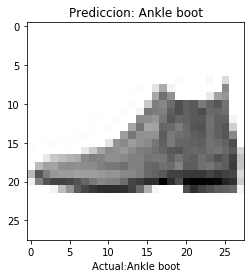

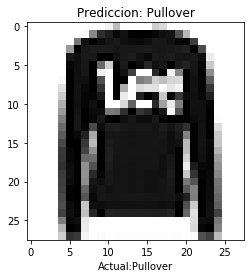

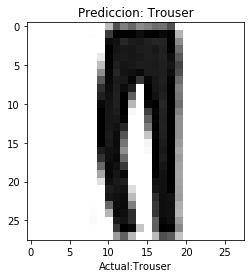

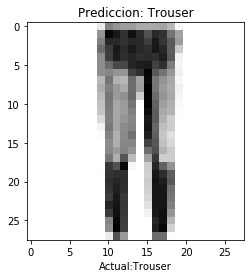

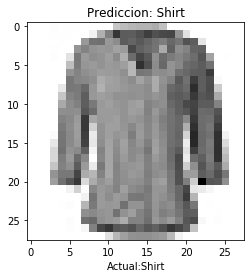

In [43]:
#Vamos a hacer un bucle donde podamos observar el valor predicho
# y la etiqueta que le corresponde. El bucle muestra algunas imagenes
# las muestra en la pantalla y luego muestra tambien la prediccion
# y lo que realmente son

for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual:" + class_names[test_labels[i]])
    plt.title("Prediccion: " + class_names[np.argmax(predictions[i])])
    plt.show()


**Grafique** esto para poder ver todo el set de la prediccion de las 10 clases.

In [44]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Miremos la imagen [0], sus predicciones y el arreglo de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

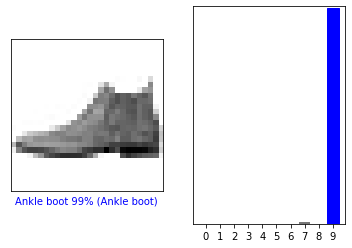

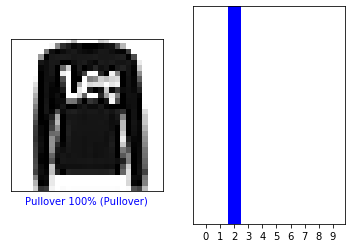

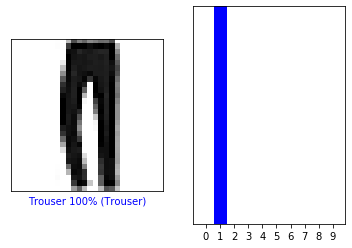

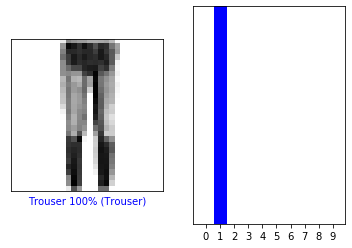

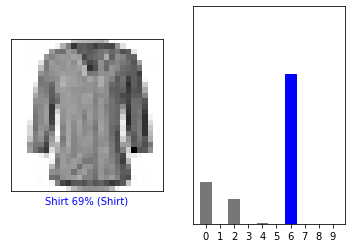

In [50]:
for i in range(5):
#i = 0
    #plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()

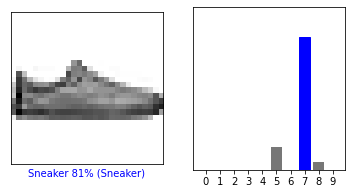

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

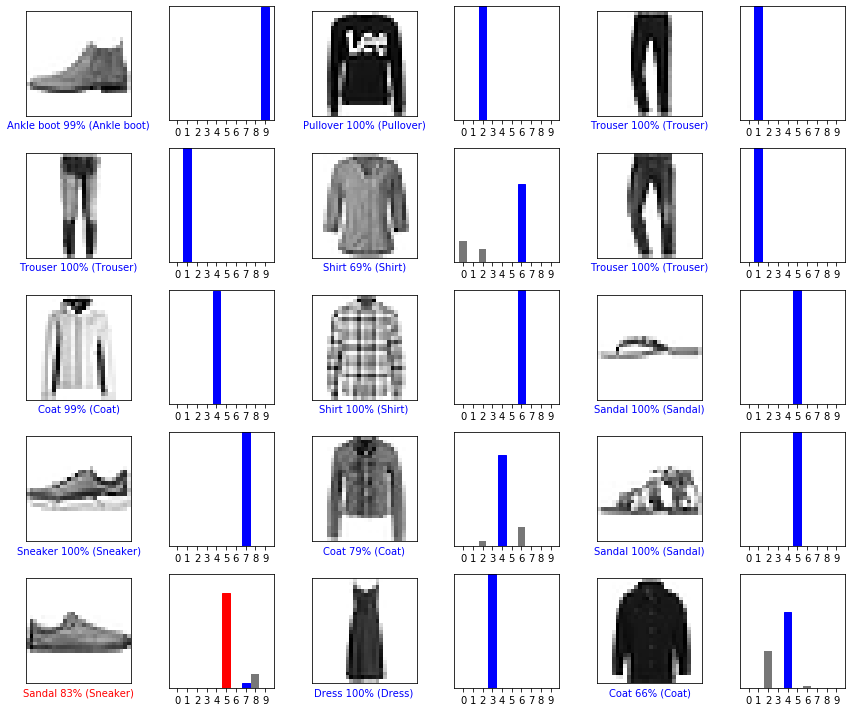

In [51]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [53]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


Los modelos de `tf.keras` son optimizados sobre *batch* o bloques, 
o coleciones de ejemplos por vez.
De acuerdo a esto, aunque use una unica imagen toca agregarla a una lista:

In [54]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Ahora prediga la etiqueta correcta para esta imagen:

In [55]:
predictions_single = model.predict(img)

print(predictions_single)

[[9.5833439e-06 5.5018538e-16 9.9964130e-01 1.4478718e-10 1.7664777e-04
  1.9357167e-09 1.7260626e-04 1.3539471e-15 1.5838330e-12 3.3871266e-15]]


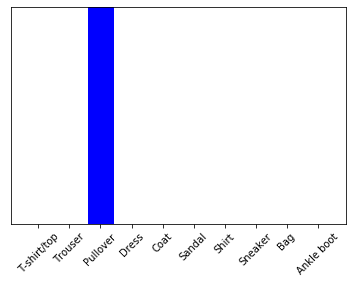

In [56]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` retorna una lista de listas para cada imagen dentro del *batch* o bloque de datos. Tome la prediccion para nuestra unica imagen dentro del *batch* o bloque:

In [57]:
np.argmax(predictions_single[0])

2

Y el modelo predice una etiqueta de 2.